## Exploratory Data Analysis With Python
### What is Exploratory Analysis?
A preliminary step in data analysis to: 

1. Summarize main characteristics of the data
2. Gain better understanding of the data
3. Uncover relationships between the data set
4. Extract important variables  

Our goal here being to answer the question:  
"**What are the characteristics that have the most impact on the car price**?"

---

### Introduction

Using a test notebook, we start with an import of a few essential libraries  
and assigning the data we want to use to a var.  

Then we want to initiate our data frame! 

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as sts

df_data = Path().cwd().parent.parent/"Data"/"Clean_Data"/"clean_auto_df.csv"
auto_df = pd.read_csv(df_data)

We've already wrangled the data we're using, it's time to focus on what the  
data could be telling us. We'll work on visualizing the data to observe  
association.

**Functions commonly used in EDA:**  

- describe()
- info()
- value_counts()
- linspace()
- cut()
- boxplot()
- scatter()
- show()
- groupby()
- get_group()
- f_oneway()
- corr()  

---  

### Descriptive Statistics  

Below, we start with descriptive statistics, which tells us a summary of the  
basic statistical numerical data, excluding object and bool types unless  
passed a paramater to do so. Naan values are also excluded in these statistics.  

**Ex.**  
`print(auto_df.describe(include='all'))` *A special string keyword in pandas*  

`print(auto_df.describe(include=[bool]))` *Only describes columns with bool*  

This function will give you a clearer idea of the distribution of your  
different variables; later we'll visualize this data with a boxplot.  

In [ ]:
# auto_df.head(20)
print(auto_df.describe())

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,9.0,111,5000.0,11.190476,8.703704,13495.0,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,9.0,111,5000.0,11.190476,8.703704,16500.0,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,9.0,154,5000.0,12.368421,9.038462,16500.0,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,10.0,102,5500.0,9.791667,7.833333,13950.0,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,8.0,115,5500.0,13.055556,10.681818,17450.0,False,True,True,False
5,2,122,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,8.5,110,5500.0,12.368421,9.400000,15250.0,False,True,True,False
6,1,158,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,...,8.5,110,5500.0,12.368421,9.400000,17710.0,False,True,True,False
7,1,122,audi,four,wagon,fwd,front,105.8,0.925997,0.991667,...,8.5,110,5500.0,12.368421,9.400000,18920.0,False,True,True,False
8,1,158,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,...,8.3,140,5500.0,13.823529,11.750000,23875.0,False,True,False,True
9,2,192,bmw,two,sedan,rwd,front,101.2,0.849592,0.900000,...,8.8,101,5800.0,10.217391,8.103448,16430.0,False,True,True,False


**What about the descriptive statistics for our categorical data?**  

To get quick descriptive information in a user-friendly output, you want to  
pair `value_counts()` with `to_frame()`. Value_counts() to get the frequency  
of each value in the specified column--for example, `auto_df["drive-wheels"]`,  
and then to_frame() for the desired presentation.      

In [4]:
drive_wheel_counts = auto_df["drive-wheels"].value_counts().to_frame()
drive_wheel_counts.columns = ['value_counts']
drive_wheel_counts.index.name = 'drive-wheels'

print(drive_wheel_counts)

              value_counts
drive-wheels              
fwd                    118
rwd                     75
4wd                      8


The next important part of EDA and descriptive analytics is visualization.  

We can visualize data with one of the most common EDA tools which allows us to  
determine data distribution at a glance.  

It is *primarily effective* with **grouped categorical data** (for example,  
drive-wheels) and sometimes binned continuous/numerical data. With  
**categorical data** we can see how our target variable compares to our  
predictor variable. For **numerical data** we can analyze a column with a wide  
range to compare your target variable across those ranges (low, med, high).  

**What boxplots can tell you**  

- **Box (IQR):** The interquartile range (Q1 to Q3) shows where the middle 50%  
  of your data lies. A small box means low variability; a large box means  
  greater spread among typical values.

- **Median line:** This tells you the central value. If it’s not centered in  
  the box, the distribution is skewed (e.g., median closer to  
  Q1 = positive/right skew).

- **Whiskers:** Typically extend to 1.5×IQR or to min/max in your data. If  
  whiskers are uneven in length, this hints at skewness or asymmetry.

- **Outliers (dots):** Individual points beyond the whiskers flag unusual  
  values. A high number of outliers might suggest:

  - *Heavy-tailed distribution*

  - *Data entry errors*
  
  - *Real-world phenomena needing explanation*  

If there is **significant overlap** in the IQR of different groups, it is NOT  
a good predictor of price.  

<Axes: xlabel='drive-wheels', ylabel='price'>

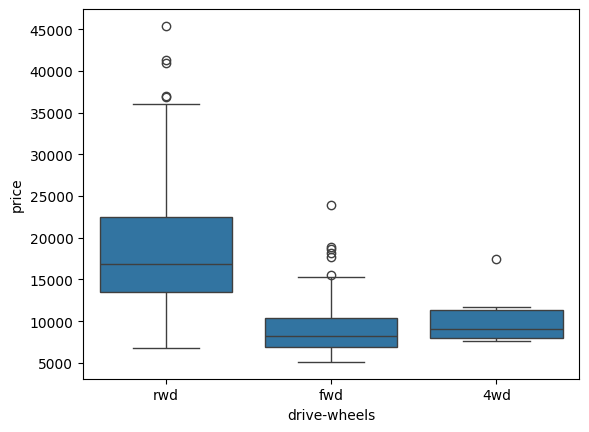

In [5]:
sns.boxplot(y="price", x="drive-wheels", data=auto_df)

<Axes: xlabel='horsepower-binned', ylabel='price'>

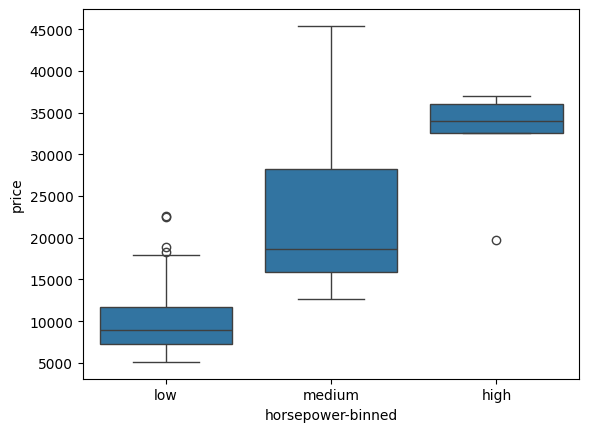

In [6]:
# Here is an example using binning on numerical data
bins = np.linspace(min(auto_df["horsepower"]), max(auto_df["horsepower"]), 4)
group_names = ['low', 'medium', 'high']

hp_binned = pd.cut(
    auto_df["horsepower"],
    bins,
    labels=group_names,
    include_lowest=True
)
hp_df = hp_binned.to_frame(name="horsepower-binned")
hp_df["price"] = auto_df["price"]

# hp_df.head()


sns.boxplot(y="price", x="horsepower-binned", data=hp_df)

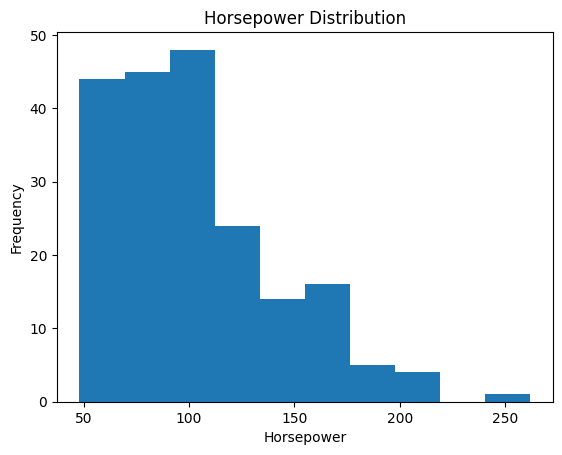

In [7]:
plt.hist(auto_df["horsepower"], bins=10)
plt.xlabel("Horsepower")
plt.ylabel("Frequency")
plt.title("Horsepower Distribution")
plt.show()


Another visualization tool we can use is the **scatter plot**. Truly made for  
comparing continuous data (target and predictor), it explores the relationship  
between the two to identify patterns or trends.

<function matplotlib.pyplot.show(close=None, block=None)>

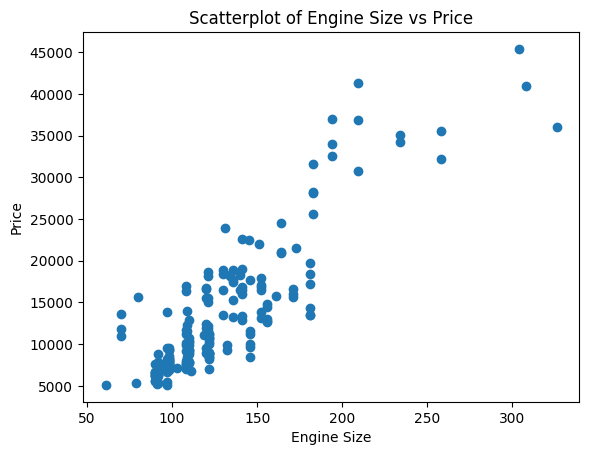

In [8]:
y = auto_df["price"]
x = auto_df["engine-size"]
plt.scatter(x,y)

plt.title("Scatterplot of Engine Size vs Price")
plt.ylabel("Price")
plt.xlabel("Engine Size")
plt.show

---

### Groupby()  

While you can apply groupby() to numerical data, it works best when there are  
multiple of the same unique values in categorical data. It helps explore  
relationships between your target variable and predictors, and if different  
categories or category pairs explain variation in the target.  

`groupby()` method: 

- Can be applied on categorical variables  
- Group Data into categories  
- Single or multiple variables

In [9]:
# Finding the average price of vehicles and observing how they differ between
# categories of "body-style" and "drive-wheels".

df_test = auto_df[['drive-wheels', 'body-style', 'price']]

# Grouping by just one category
df_group = df_test.groupby(['drive-wheels'], as_index=False)["price"].mean()
print(df_group)

# as_index=False means the group keys (drive-wheels, body-style) will not 
# become the index of the result--best for visualization.
df_group2 = df_test.groupby(
    ['drive-wheels',
    'body-style'],
    as_index=False
).mean()

print(df_group2)

  drive-wheels         price
0          4wd  10241.000000
1          fwd   9244.779661
2          rwd  19757.613333
   drive-wheels   body-style         price
0           4wd    hatchback   7603.000000
1           4wd        sedan  12647.333333
2           4wd        wagon   9095.750000
3           fwd  convertible  11595.000000
4           fwd      hardtop   8249.000000
5           fwd    hatchback   8396.387755
6           fwd        sedan   9811.800000
7           fwd        wagon   9997.333333
8           rwd  convertible  23949.600000
9           rwd      hardtop  24202.714286
10          rwd    hatchback  14337.777778
11          rwd        sedan  21711.833333
12          rwd        wagon  16994.222222


In [10]:
# Best for multi-level indexing and easy slicing
index_test = auto_df[['drive-wheels', 'body-style', 'price']]
index_group = index_test.groupby(['drive-wheels', 'body-style']).mean()

avg_rwd_convertible = index_group.loc[("rwd", "convertible")]
print(avg_rwd_convertible)

price    23949.6
Name: (rwd, convertible), dtype: float64


---  

### Pivot() Method  

While the output of our groupby methods is suitable for some cases, you may  
find yourself wanting something easier to read when moving from a data frame  
(long) structure to a wider layout.  

Enter the `pivot()` method.

Here, one vsriable is displayed along the columns and the other variable is  
displayed along the rows (as opposed to fatures being columns).  



In [11]:
df_pivot = df_group2.pivot(index="drive-wheels", columns="body-style")
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Once we have the pivot table, a great way to view the target variable across  
multiple variables for visual clues about relationship is with a **heatmap**.  

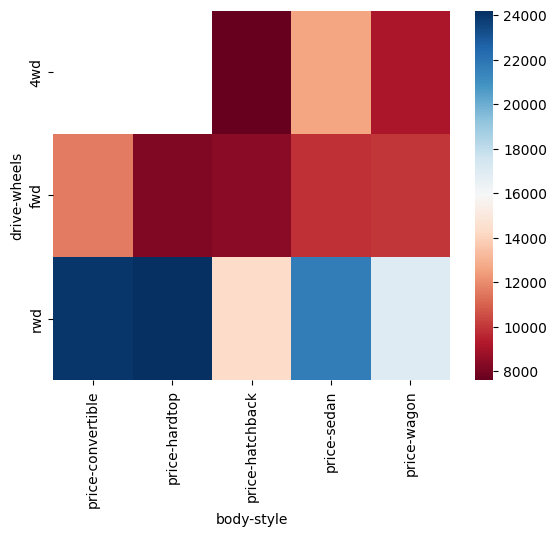

In [18]:
sns.heatmap(df_pivot, cmap='RdBu')
plt.ylabel("drive-wheels")
plt.xlabel("body-style")
plt.show()

---  

### Analysis of Variance (ANOVA)

ANOVA is a statistical method used to compare the means of two or more groups  
to determine if there is a significant difference between them. It answers  
questions like:  

- Do different car brands have significantly different average prices?
- Does a new drug have a different effect than existing treatments?  

ANOVA returns two values:  
1. **F-static score (F-score):** Measures how much variation exists *between*  
group means compared to the variation within each group  
(F=variation between group means/variation within groups)
   - High f-score means the group means are significantly different
   - Low f-score means the group means are very similar  

1. **P-value:** Determines if the difference is statistically significant  
   - A p-value < 0.05 suggests a strong difference (reject null hypothesis)
   - A p-value > 0.05 suggests there is no strong difference (failt to reject  
    null hypothesis)  



In [13]:
df_anova = auto_df[["make", "price"]]
anova_grouped = df_anova.groupby("make")

anova_results = sts.f_oneway(
    anova_grouped.get_group("honda")["price"],
    anova_grouped.get_group("subaru")["price"]
)

# F-score low, p-val > 0.05. No meaningful price difference between 
# these brands
print(anova_results)

F_onewayResult(statistic=np.float64(0.19744030127462608), pvalue=np.float64(0.6609478240622193))


In [14]:
# What about testing your entire category/independent variable at one time?
# For that, we use Boolean indexing

# Look in grouped_test, keep rows where drive-wheels is 'x' value (our 
# modular condition), and give me the corresponding price from the "price"
# column
grouped_test = auto_df[["drive-wheels", "price"]]
group1 = grouped_test.loc[grouped_test["drive-wheels"] == "fwd", "price"]
group2 = grouped_test.loc[grouped_test["drive-wheels"] == "rwd", "price"]
group3 = grouped_test.loc[grouped_test["drive-wheels"] == "4wd", "price"]

anova_results2 = sts.f_oneway(group1, group2, group3)
print(f"The ANOVA is: {anova_results2}")

# F-score high, p-val extremely small. There is a strong, meaningful difference
# between drive-wheels

The ANOVA is: F_onewayResult(statistic=np.float64(67.954065007804), pvalue=np.float64(3.3945443577149576e-23))


---  

### Correlation  

Correlation is the statistical metric for measuring to what extent different  
numerical variables are interdependent. In other words, when we look at  
two variables time, if one variable changes, how does this effect change  
in the other variable?

We view this correlation on a scatter plot with an included regression line:  
- Steep inclines indicate a strong predictor, flat indicates poor
- Upward slope = positive correlation, downward slope = negative correlation  

*Note: Correlation is not causation. DA mostly deals with correlation.*

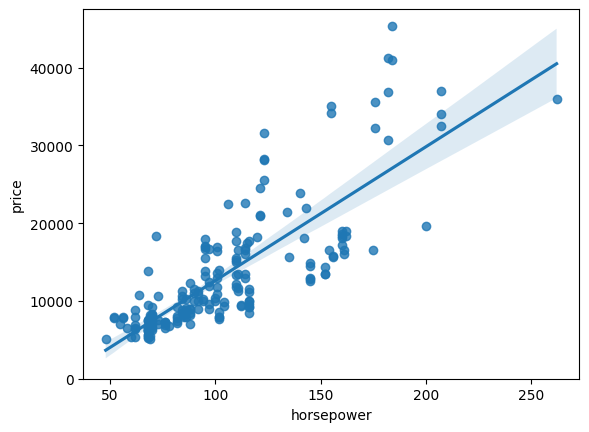

In [15]:
sns.regplot(x="horsepower", y="price", data=auto_df)
plt.ylim(0,)
plt.show()

### Correlation Statistics (`stats.pearsonr()`) 

**Pearson Correlation** measures the strength of the correlation between two  
features. It returns two values:
- Correlation coefficient
  - **Close to +1**: Large positive relationship  
  - **Close to -1**: Large negative relationship  
  - **Close to 0**: No relationship  
- P-value
  - **P-value < 0.001**: Strong certainty in the result  
  - **p-value < 0.05**: Moderate certainty in the result  
  - **P-value < 0.1**: Weak certainty in the result  
  - **P-value > 0.1**: NO certainty in the result  

For the sake of our future modeling, we would go through each numerical feature  
and determine the correlation with price to identify the strongest influencing  
features.

In [16]:
pearson_coef, p_value = sts.pearsonr(auto_df["horsepower"], auto_df["price"])
print(f"The Pearson Coef: {pearson_coef}")
print(f"P-value: {p_value}")

The Pearson Coef: 0.8096068016571054
P-value: 6.273536270650361e-48


### Correlation Heatmap  

An extremely quick way to both process the pearson coefficient for each data  
category compared to every other category. In this instance, we can see how  
every other category stacks with our target variable ("price").  

We must first correlate all of the categories in the df with Pandas' built in  
method, `corr()`. Once calculated, we can use `seaborn's heatmap()` function to  
visualize the distribution.

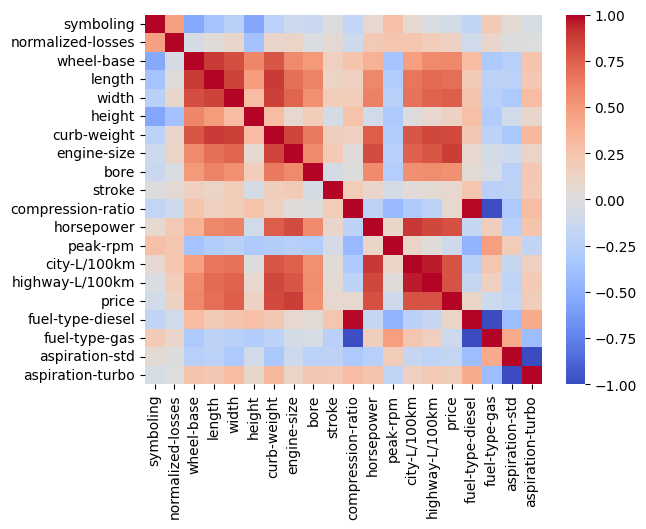

             engine-size     price
engine-size     1.000000  0.872335
price           0.872335  1.000000


In [17]:
corr = auto_df.corr(numeric_only=True)

h_map = sns.heatmap(corr, cmap='coolwarm')
plt.show()

# Exploring correlation between specific features
print(auto_df[["engine-size", "price"]].corr())